<a href="https://colab.research.google.com/github/JeongYoon-L/Analysis-NYC-Airbnb-open-data/blob/main/cse351_hw1_Lee_JeongYoon_114133199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JeongYoon Lee(114133199)_CSE351_Summer_hw1

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

#Problem 1
Examine the data, there may be some anomalies in the data, and you will have to clean the data before you move forward to other tasks. Explain what you did to clean the data.

In [5]:
import pandas as pd

#read csv file
data = pd.read_csv('AB_NYC_2019.csv')

#check structure and each column's data type of this csv file.
data.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# check data shape
data.shape

(48895, 16)

In [7]:
#check upique condition for "id" column ("id" should be the primary key and identifier so it should satisfy upique condition)
display(data[data.duplicated("id")])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


- result : None(feature "id" is already unique).

In [8]:
#check file's statistic feature
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#check the number of null value for each columns.
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- We can find the column "name", "host_name", "last_review", "reviews_per_month" have null value.

- But, "last_review" and "review_per_month" columns can have null value since there can be a situation that rooms have no review yet. So let's check those columns first.

#check null value

In [10]:
#check rows that have null value for "last_review" column.

No_last_review = data[data["last_review"].isnull()]
No_last_review[No_last_review["number_of_reviews"] != 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


- All rows that "last_review" column is null, have 0 reviews(Through checking "number_of_reviews" column).
- So we don't have to drop those rows, and will insert "2030-01-01" to "last_review" instead of null value.

In [11]:
#fill "2030-01-01" to null value
data["last_review"] = data["last_review"].fillna("2030-01-01")

In [12]:
data[data["last_review"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


There are no null value for "last_review" column anymore.

In [13]:
#check the changed value
data[data["last_review"] == "2030-01-01"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2030-01-01,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2030-01-01,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,2030-01-01,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,2030-01-01,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,2030-01-01,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2030-01-01,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2030-01-01,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2030-01-01,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2030-01-01,NaN,6,2


- There's no null value in the last_review column, and they are all changed to "2030-01-01" successfully.

In [14]:
#check rows that have null value for "reviews_per_month" column.

No_review_per_month = data[data["reviews_per_month"].isnull()]
No_review_per_month[No_review_per_month["number_of_reviews"] != 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


- All rows that "reviews_per_month" column is null have 0 reviews(Through checking "number_of_reviews" column).
- So we don't have to drop those rows, and will insert "0.00" to "reviews_per_month" column instead of null value.

In [15]:
data["reviews_per_month"] = data["reviews_per_month"].fillna("0")

In [16]:
data[data["reviews_per_month"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [17]:
#check the changed value
data[data["reviews_per_month"] == "0"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2030-01-01,0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2030-01-01,0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,2030-01-01,0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,2030-01-01,0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,2030-01-01,0,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2030-01-01,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2030-01-01,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2030-01-01,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2030-01-01,0,6,2


There's no null value in the reviews_per_month column, and they are all changed to "0".

In [18]:
#check rows that have null value for "host_name" column.

No_host_name = data[data["host_name"].isnull()]
No_host_name

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,2030-01-01,0,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,2030-01-01,0,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


- It seems that those null value for this "host_name" column will not affect to future analysis.
- We can't know why the host_name have null value. We can assume that there's some reasons that the host_name was not mandatory field in airbnb website when the host register their informantion, or it can be happended in some error.
- I think since we have host_id which is the identifier for host, and analyzing host_name (word literally) will not that important in my analysis. So I think I don't have to drop those rows or change them.

In [19]:
#check null value in "name" column.
No_name = data[data["name"].isnull()]
No_name

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,2030-01-01,0,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,2030-01-01,0,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,2030-01-01,0,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,2030-01-01,0,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,2030-01-01,0,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,2030-01-01,0,5,0


- Similarliy, it seems that it will not cause any problem with this null data in this column. It can have some reasons that the name was not mandatory field in airbnb website when the host register their room information, or it can be happended in some error.
- But different from the previous "host_name" column, "name" column can be used for analyzing meaningful result. So I decided to change those rows to "No name"

In [20]:
#change rows that have null value for the colume "name"
data["name"] = data["name"].fillna("No Name")

No_host_name = data[data["name"].isnull()]
No_host_name

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [21]:
#check changed value
data[data["name"] == "No Name"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,No Name,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,2030-01-01,0,1,362
3703,2232600,No Name,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,No Name,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,No Name,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,No Name,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,2030-01-01,0,1,0
6567,4756856,No Name,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,2030-01-01,0,1,0
6605,4774658,No Name,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,2030-01-01,0,1,0
8841,6782407,No Name,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,2030-01-01,0,1,0
11963,9325951,No Name,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,No Name,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,2030-01-01,0,5,0


#Normalization

Before analyzing data, we need to think that normalization for data is needed or not.
In my opinion, I thought normalization for the continuous data is needed, so I do this process.

In [22]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()

#for the continous data
data_norm = data[["price",	"minimum_nights",	"number_of_reviews",	"reviews_per_month",	"calculated_host_listings_count",	"availability_365"]]

transformer.fit(data_norm)
data_norm[:] = transformer.fit_transform(data_norm[:])
data_norm

data_normalize = data.copy()

data_normalize['price'] = data_norm['price']
data_normalize['minimum_nights'] = data_norm['minimum_nights']
data_normalize['number_of_reviews'] = data_norm['number_of_reviews']
data_normalize['reviews_per_month'] = data_norm['reviews_per_month']
data_normalize['calculated_host_listings_count'] = data_norm['calculated_host_listings_count']
data_normalize['availability_365'] = data_norm['availability_365']

#result
data_normalize


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.0149,0.000000,0.014308,2018-10-19,0.003590,0.015337,1.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.0225,0.000000,0.071542,2019-05-21,0.006496,0.003067,0.972603
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,0.0150,0.001601,0.000000,2030-01-01,0.000000,0.000000,1.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.0089,0.000000,0.429253,2019-07-05,0.079316,0.000000,0.531507
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,0.0080,0.007206,0.014308,2018-11-19,0.001709,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,0.0070,0.000801,0.000000,2030-01-01,0.000000,0.003067,0.024658
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,0.0040,0.002402,0.000000,2030-01-01,0.000000,0.003067,0.098630
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,0.0115,0.007206,0.000000,2030-01-01,0.000000,0.000000,0.073973
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.0055,0.000000,0.000000,2030-01-01,0.000000,0.015337,0.005479


#check outlier

When we do pre-processing data, we also need to think about outliers.
It depends what domain is, and for me I keep thinking the airbnb room renting industry.

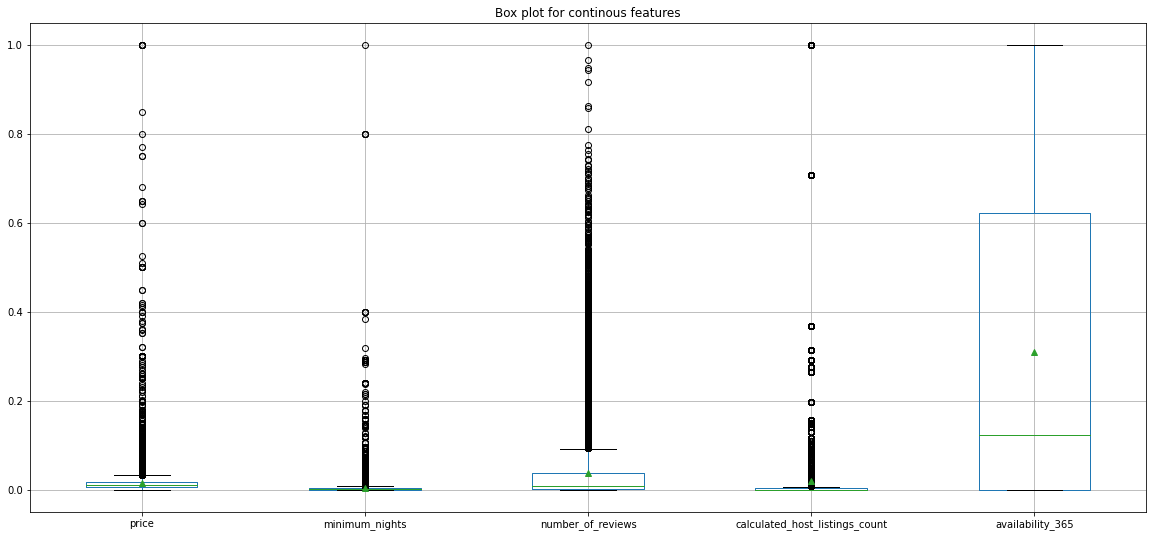

In [267]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,9))
data_normalize.boxplot(column = ["price",	"minimum_nights",	"number_of_reviews","calculated_host_listings_count",	"availability_365"], showmeans=True)
plt.title('Box plot for continous features')
plt.show()


For those features, even though they are gathered in one place, I thought they can be a meaningful data. 
- For the price, the price can be higher than others if the room is really great, and for the minimum nights, some hosts allow that people can book more than 1 year. Same as number_of_reviews and other features.
- So I didn't treat them as an outlier for this dataset. They can be a meaningful and realistic data.

#Problem 2
Examine how the prices of the Airbnb changes with the change in the neighborhood.

#problem 2-a
Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood
(select only neighborhoods with more than 5 listings).


- Top 5 neighbourhood based on the price of the Airbnb

In [238]:
highest_price_neighborhood = data[data['calculated_host_listings_count']>5].sort_values(by = 'price', ascending = False)
highest_price_neighborhood

data_group_highestprice = highest_price_neighborhood.groupby('neighbourhood').median().sort_values(by = 'price', ascending = False)[:5]
data_group_highestprice

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,
Flatiron District,33577934.0,107434423.0,40.743940,-73.990940,321.0,30.0,0.0,232.0,330.0
DUMBO,30638114.0,107434423.0,40.703720,-73.985450,312.0,30.0,0.0,232.0,349.0
Tribeca,30389559.0,107434423.0,40.716180,-74.006670,291.0,30.0,0.0,232.0,280.0
West Village,27190158.5,22541573.0,40.731995,-74.003405,243.0,30.0,0.0,76.0,278.5
Midtown,27237510.0,69545883.0,40.754020,-73.973560,239.0,29.0,1.0,31.0,311.0


- Flatiron District, DUMBO, Tribeca, West Village, Midtown is the top 5 neighbourhood based on the price of airbnb.
- I used median to analyze this data since there's some outliers in the price feature.

- Bottom 5 neighbourhood based on the price of the Airbnb

In [239]:
smallest_price_neighborhood = data[data['calculated_host_listings_count']>5].sort_values(by = 'price')
smallest_price_neighborhood

data_group_lowprice = smallest_price_neighborhood.groupby('neighbourhood').median().sort_values(by = 'price')[:5]
data_group_lowprice


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,
Bay Ridge,33947230.0,51596474.0,40.625385,-74.01988,23.0,9.5,1.0,12.0,0.0
Gravesend,33059198.0,51596474.0,40.588815,-73.97137,25.0,7.0,1.0,6.0,177.0
Kingsbridge,32364762.0,19303369.0,40.884740,-73.90321,27.0,30.0,0.0,37.0,0.0
Glendale,22636942.5,158540605.0,40.700430,-73.88953,27.5,1.0,82.0,6.0,255.0
Port Morris,34715931.0,30509656.0,40.808680,-73.93147,28.0,1.0,4.0,8.0,88.0


- Bay Ridge, Gravesend, Kingsbridge, Glendale, Port Morris is the Bottom 5 neighbourhood based on the price of airbnb.
- I also used median to analyze this data since there's some outliers in the price feature.

#problem 2-b
Analyze, the price variation between different neighborhood group, and plot these trends

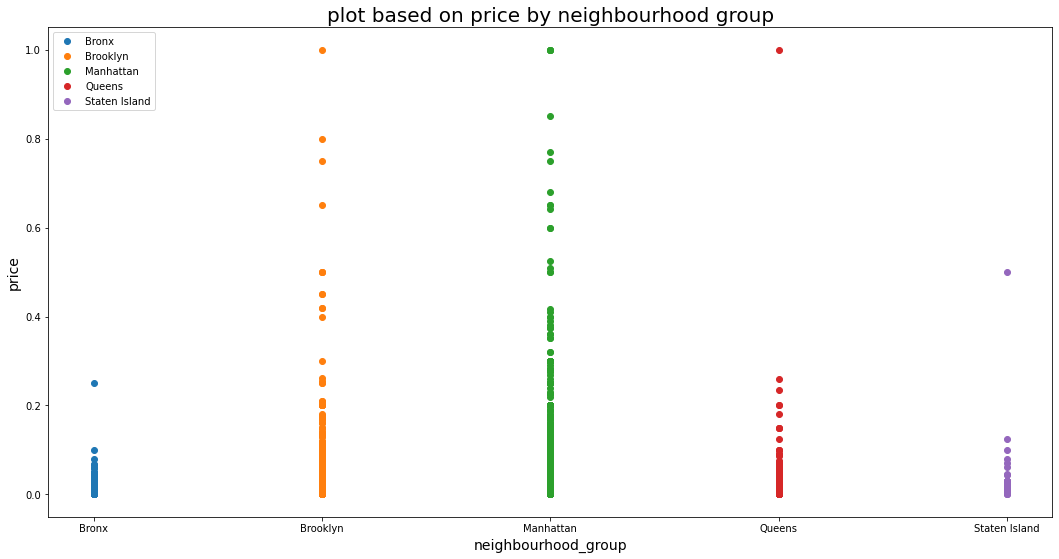

In [268]:
data_group = data_normalize.groupby('neighbourhood_group')

fig, ax = plt.subplots(figsize=(18,9))

for name, group in data_group:

    ax.plot(group.neighbourhood_group, 

            group.price, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=10, loc='upper left') # legend position

plt.title('plot based on price by neighbourhood group', fontsize=20)

plt.xlabel('neighbourhood_group', fontsize=14)

plt.ylabel('price', fontsize=14)

plt.show()



- I printed the scatter plot with each neighbourhood_group's price.
- You can see the price variation through this plot.

In [243]:
data_group = data.groupby('neighbourhood_group')
data_group_std = pd.DataFrame(data_group.median()["price"])
data_group_std


,price
neighbourhood_group,
Bronx,65.0
Brooklyn,90.0
Manhattan,150.0
Queens,75.0
Staten Island,75.0


- I printed the median value of each neighbourhood group's price. 
- Since the Manhattan is highest value, I printed top 50 based on the price in Manhattan, and you ocan find the table below.

In [27]:
manhattan = data_normalize['neighbourhood_group'] == "Manhattan"
manhattan = data_normalize[manhattan]
manhattan.sort_values(by = 'price', ascending = False)[:50]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,1.0000,0.023219,0.000000,2030-01-01,0.000000,0.000000,0.227397
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,0.9999,0.078463,0.009539,2016-01-01,0.002393,0.000000,0.227397
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,0.9999,0.023219,0.000000,2030-01-01,0.000000,0.000000,1.000000
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,0.9999,0.003203,0.001590,2015-01-02,0.000342,0.000000,0.000000
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,0.8500,0.023219,0.003180,2018-09-18,0.003077,0.000000,0.687671
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,0.7703,0.000000,0.000000,2030-01-01,0.000000,0.033742,0.400000
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,0.7500,0.000000,0.000000,2030-01-01,0.000000,0.000000,0.997260
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,0.6800,0.000000,0.000000,2030-01-01,0.000000,0.015337,0.997260
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,0.6500,0.143315,0.000000,2030-01-01,0.000000,0.000000,1.000000
37194,29547314,Apartment New York \nHell’s Kitchens,35303743,Patricia,Manhattan,Upper West Side,40.76835,-73.98367,Private room,0.6500,0.023219,0.000000,2030-01-01,0.000000,0.000000,0.265753


- I tried to show the standard deviation and median value for each neighbourhood group.

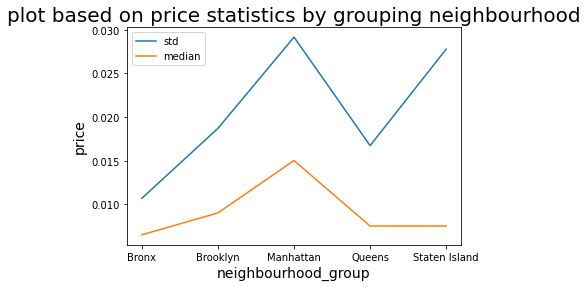

In [269]:
data_group_std = pd.DataFrame(data_group.std()["price"])
data_group_median = pd.DataFrame(data_group.median()["price"])

x_val = data_group_std.index
y_val = data_group_std["price"]
plt.title('plot based on price statistics by grouping neighbourhood', fontsize=20)
plt.plot(x_val, y_val)

x_val_median = data_group_median.index
y_val_median = data_group_median["price"]
plt.plot(x_val_median, y_val_median)

plt.legend(['std','median'])
plt.xlabel('neighbourhood_group', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.show()

#problem 3
Select a set of the most interesting features. Do a pairwise Pearson correlation analysis on all pairs
of these variables. Show the result with a heat map and find out most positive and negative
correlations.

In [249]:
import scipy.stats as stats
corr = data_normalize.corr(method = 'pearson')
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


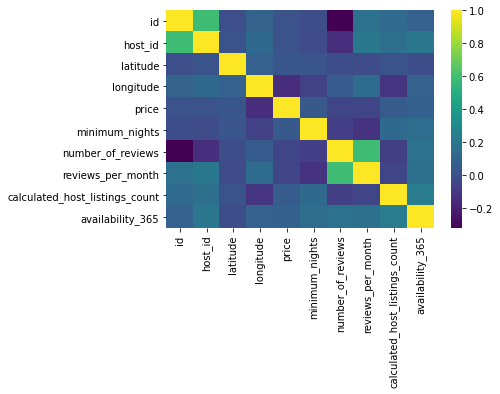

In [250]:
import seaborn as sns
sns.heatmap(corr, cmap='viridis')
plt.show()   

- The most positive correlation is between 'id' and 'host_id' which is 0.588290.
(But this don't have any meaningful meaning since the id is random identifier number)
- The most negative correlation is between 'id' and 'number_of_reviews' which is -0.319760.

- Totally, the correlation values are not tha high, but we should consider other factor like p-value or r square and the amount of dataset when we analyze.

In [253]:
import scipy.stats as stats
data_normalize[['price','reviews_per_month']].corr(method = 'pearson')

,price,reviews_per_month
price,1.000000,-0.050564
reviews_per_month,-0.050564,1.000000


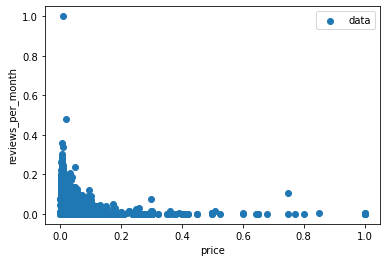

In [254]:
plt.scatter( data_normalize['price'], data_normalize['reviews_per_month'], label = "data")

plt.legend(loc = "best")
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.show()

- I want to know how the price and reviews_per_month are related, but their correlation is so low, also we cannot find any specific correlation in the scatter plot as we can see.

In [255]:
data_normalize[['price','availability_365']].corr(method = 'pearson')

,price,availability_365
price,1.000000,0.081829
availability_365,0.081829,1.000000


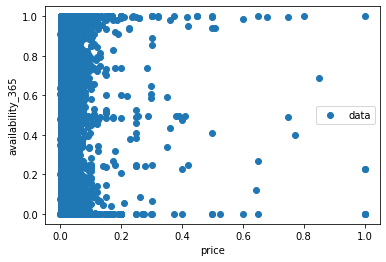

In [256]:
plt.scatter( data_normalize['price'], data_normalize['availability_365'], label = "data")

plt.legend(loc = "best")
plt.xlabel('price')
plt.ylabel('availability_365')
plt.show()

- I want to know how the price and availability_365 are related, but their correlation is also low, also we cannot find any specific correlation in the scatter plot as we can see. Even though the correlation calue is 0.0818.

#problem 4
The Latitude and Longitude of all the Airbnb listings are provided in the dataset

#problem 4-a
Plot a scatter plot based on these coordinates, where the points represent the location of an
Airbnb, and the points are color coded based on the neighborhood group feature.


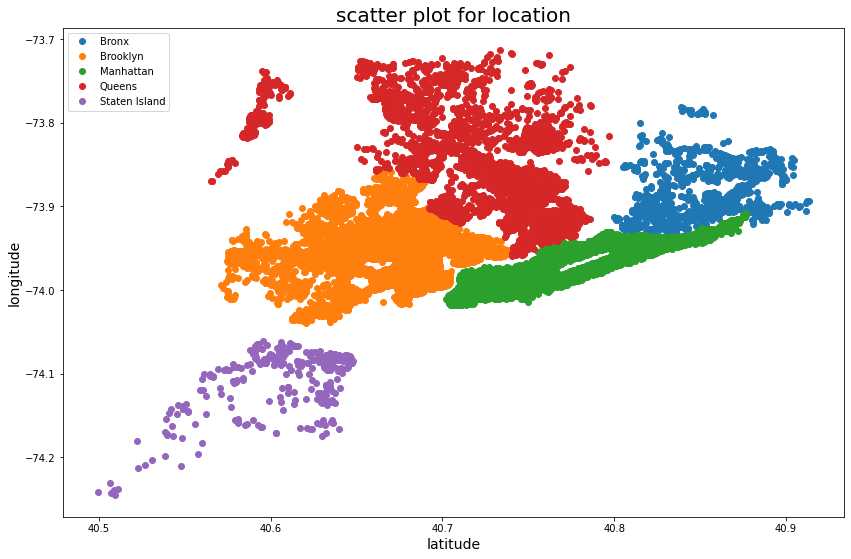

In [270]:
#check outlier for latitude and longtitude

import matplotlib.pyplot as plt
data_group = data_normalize.groupby('neighbourhood_group')

fig, ax = plt.subplots(figsize=(14,9))

for name, group in data_group:

    ax.plot(group.latitude, 

            group.longitude, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=10, loc='upper left') # legend position

plt.title('scatter plot for location', fontsize=20)

plt.xlabel('latitude', fontsize=14)

plt.ylabel('longitude', fontsize=14)

plt.show()



#problem 4-b
Now again, plot a scatter plot based on these coordinates, where the points represent the
location of an Airbnb, and the points are color coded based on the price of the particular Airbnb,
where price of the listing is less than 1000. Looking at the graph can you tell which
neighborhood group is the most expensive. 


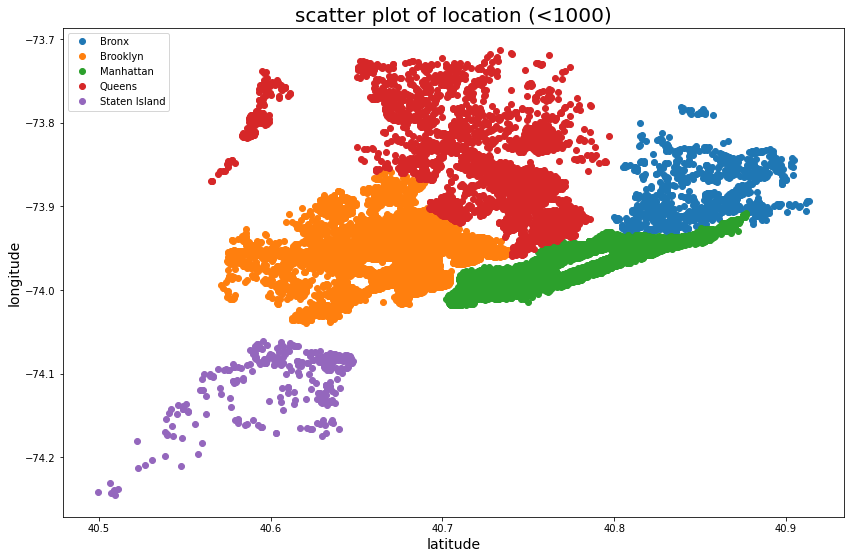

In [264]:
#check outlier for latitude and longtitude

import matplotlib.pyplot as plt

data_4b = data_normalize.copy()
data_4b = data_4b[data_4b['price']< 1000]
data_group = data_4b.groupby('neighbourhood_group')

fig, ax = plt.subplots(figsize=(14,9))

for name, group in data_group:

    ax.plot(group.latitude, 

            group.longitude, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=10, loc='upper left') # legend position

plt.title('scatter plot of location (<1000)', fontsize=20)

plt.xlabel('latitude', fontsize=14)

plt.ylabel('longitude', fontsize=14)

plt.show()

- Since there are not many listings more than 1000 price, the scatter plot is similar to upper plot.


#problem 5
Word clouds are useful tool to explore the text data. Extract the words from the name of the Airbnb
and generate a word cloud. 

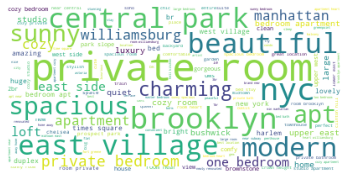

In [36]:
#analysis through words
from wordcloud import WordCloud 

data['name'] = data['name'].str.lower()

data['name']

text3 = ' '.join(data['name'])
text3
wordcloud2 = WordCloud( background_color='white').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


- I made the word with lower case letter and then do wordCloud.
- The "private room" and "central park" is the most frequent word in this dataset, and I think the number of manhattan listing are much, and many travlers are comming to Manhattan.

#problem 6
Find out which areas has the busiest (hosts with high number of listings) host? Are there any
reasons, why these hosts are the busiest, considers factors such as availability, price, review, etc.?
Bolster you reasoning with different plots and correlations. 

{'boxes': [<matplotlib.lines.Line2D at 0x7fcfbcb77d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcfbd019950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfbcb533d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfbcb535d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcfbd2b19d0>,
  <matplotlib.lines.Line2D at 0x7fcfbcb77350>]}

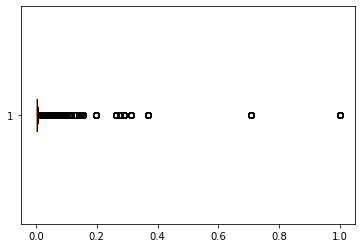

In [265]:
plt.boxplot(data_normalize['calculated_host_listings_count'], vert = False)


- When I saw the box plot, the maximum value and minimum, mean value are very different. The maximum value is too huge so I dicided to find top 3% of host_listings to find the busiest host.

In [38]:
#top 3% of host_listings

data_normalize['calculated_host_listings_count'].quantile(0.97)

0.14723926380368096

In [39]:
#find top 3% busiest host

data_busiest_host = data_normalize.drop_duplicates(['host_id'])
data_busiest_host = data_busiest_host[data_busiest_host['calculated_host_listings_count']>= 0.14723926380368096]
data_busiest_host= data_busiest_host.sort_values(by = 'calculated_host_listings_count', ascending = False)
data_busiest_host


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,0.0302,0.022418,0.000000,2030-01-01,0.000000,1.000000,0.846575
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,0.0308,0.023219,0.000000,2030-01-01,0.000000,0.708589,0.427397
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,0.0169,0.023219,0.004769,2018-12-07,0.001538,0.368098,0.997260
32718,25779464,Lovely Room in the Heart of Manhattan,137358866,Kazuya,Manhattan,Harlem,40.81118,-73.94231,Private room,0.0056,0.023219,0.006359,2019-04-06,0.006325,0.312883,0.668493
5093,3662724,5144-Prime Doorman!78ST & Madison,16098958,Jeremy & Laura,Manhattan,Upper East Side,40.77448,-73.96102,Entire home/apt,0.0175,0.023219,0.003180,2019-05-30,0.001026,0.291411,0.769863
30637,23702074,Sonder | 180 Water | Lovely 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70738,-74.00493,Entire home/apt,0.0212,0.022418,0.000000,2030-01-01,0.000000,0.291411,0.909589
14682,11602050,Museum Mile 1 BR - Madison Ave,61391963,Corporate Housing,Manhattan,Upper East Side,40.78465,-73.95735,Entire home/apt,0.0133,0.023219,0.011129,2019-01-19,0.003761,0.276074,0.852055
15865,12832371,"East 74th street, Cozy UES 1bd Serviced Apartment",22541573,Ken,Manhattan,Upper East Side,40.77102,-73.95873,Entire home/apt,0.0163,0.023219,0.001590,2017-10-14,0.000855,0.263804,0.958904
34010,26945421,STUDIO ON WEST 56TH COLUMBUS CIRCLE~ DOORMAN,200380610,Pranjal,Manhattan,Hell's Kitchen,40.76717,-73.98614,Entire home/apt,0.0185,0.023219,0.000000,2030-01-01,0.000000,0.196319,0.936986
1386,613556,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,0.0130,0.023219,0.003180,2015-10-31,0.000513,0.156442,0.317808


In [40]:
data_group_buiest_sum = data_busiest_host.groupby('neighbourhood_group').size()
data_group_buiest_sum

neighbourhood_group
Brooklyn      1
Manhattan    13
dtype: int64

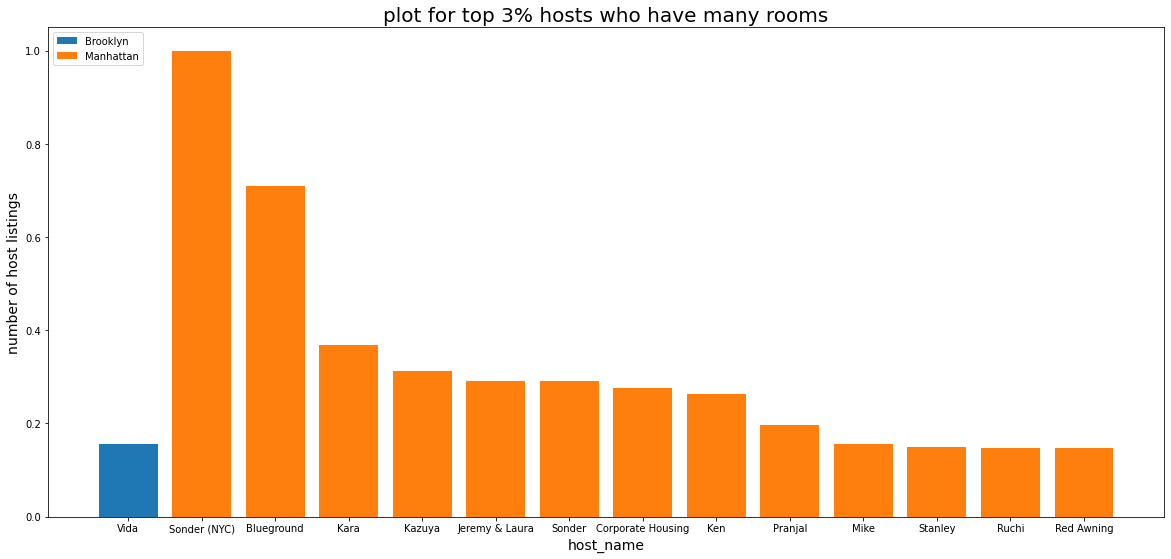

In [41]:

x = data_busiest_host['host_name']
y = data_busiest_host['calculated_host_listings_count']

data_group_buiest = data_busiest_host.groupby('neighbourhood_group')
plt.figure(figsize=(20,9))

for name, group in data_group_buiest:
  plt.bar(group.host_name,group.calculated_host_listings_count, label=name)

plt.legend(fontsize=10, loc='upper left') # legend position


plt.title('plot for top 3% hosts who have many rooms', fontsize=20)

plt.xlabel('host_name', fontsize=14)

plt.ylabel('number of host listings', fontsize=14)

plt.show()





- Manhattan has the busiest host(Sonder(NYC)).
- For the upper 3% of the busiest host, 13 of 14 hosts posted rooms in Manhattan, and 1 of 14 host posted room in Brookyln.
- Sonder(NYC) posted the most rooms to the airbnb site, and Bluground is next.


In [42]:
data_neighbourhood_buiest_size = data_busiest_host.groupby('neighbourhood').size()
data_neighbourhood_buiest_size

neighbourhood
Financial District    3
Greenpoint            1
Harlem                1
Hell's Kitchen        1
Kips Bay              1
Midtown               2
Murray Hill           1
Tribeca               1
Upper East Side       3
dtype: int64

- They existed most in Financial District and Upper East Side with 3 each.

In [266]:
import folium
busy_latitude = data.sort_values(by = 'latitude', ascending = False)
busy_longitude = data.sort_values(by = 'longitude')

airbnb_location = pd.concat([busy_latitude,busy_longitude], ignore_index=True)

map = folium.Map(location = [40.76076,-73.9887], zoom_start= 12)

for a in airbnb_location.index[:]:
    la = airbnb_location.loc[a,"latitude"]
    lo = airbnb_location.loc[a,"longitude"]
    hostname = airbnb_location.loc[a,"host_name"]
    if(hostname == "Sonder (NYC)"):
        folium.Marker([la, lo],tooltip=hostname  ).add_to(map) 
        folium.CircleMarker([la, lo],radius = 20, color = 'red', fill_color = 'red'  ).add_to(map) 
    if(hostname == "Blueground"):
        folium.Marker([la, lo],tooltip=hostname  ).add_to(map) 
    
        
    
map

- I printed the top 2 host's rooms (Sonder(NYC) and Bluground).
- And printed Sonder(NYC)'s room in red circle. 

#problem 7
Create two plots (at least one unique plot not used above) of your own using the dataset that you
think reveals something very interesting. Explain what it is, and anything else you learned. 

1. I want to analyze rooms that have no review yet.
Hoping find some reason why they don't have review yet.

- It needs more data like when they first start listing, or rating of host to analyze this reason, but I will try with this dataset first.


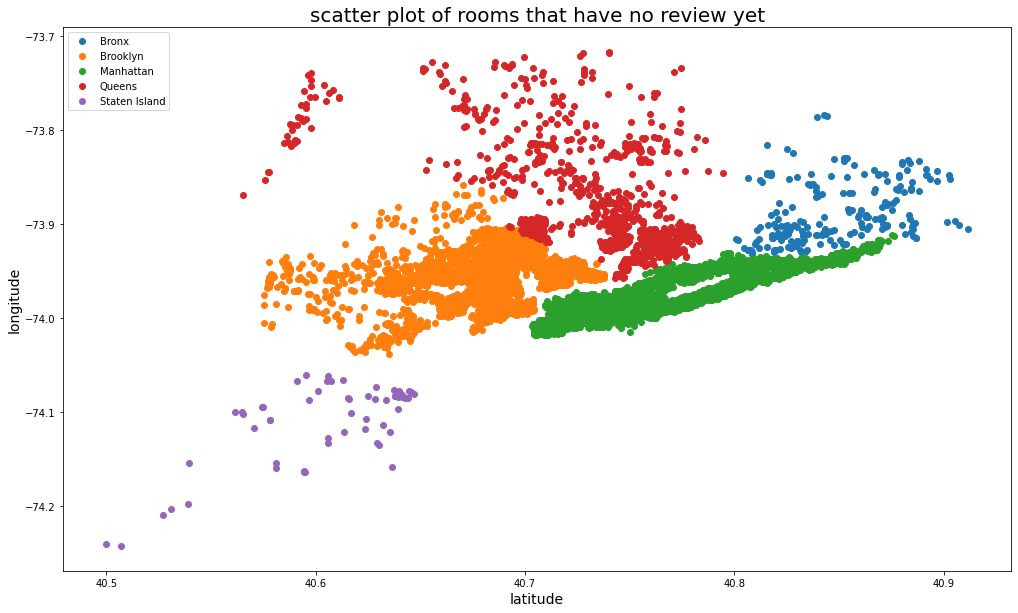

In [50]:

data_no_review = data[data['number_of_reviews']== 0]
data_no_review= data_no_review.sort_values(by = 'calculated_host_listings_count', ascending = False)
data_no_review.describe()


data_no_review = data_no_review.groupby('neighbourhood_group')

fig, ax = plt.subplots(figsize = (17,10))

for name, group in data_no_review:

    ax.plot(group.latitude, 

            group.longitude, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=10, loc='upper left') # legend position

plt.title('scatter plot of rooms that have no review yet', fontsize=20)

plt.xlabel('latitude', fontsize=14)

plt.ylabel('longitude', fontsize=14)

plt.show()


- This is the scatter plot for the rooms that have no review yet.
- We cannot say Staten island is the smallest with the 0 review room since we should consider the total listings in those region or other features.

In [51]:
data_with_review = data[data['number_of_reviews']!= 0]
data_no_review = data[data['number_of_reviews']== 0]
data_no_review['Review'] = 0
data_with_review['Review'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- I labeled with the 0 and 1 for the 0 review rooms and others.
- 0 for 0 review room, and 1 for others.

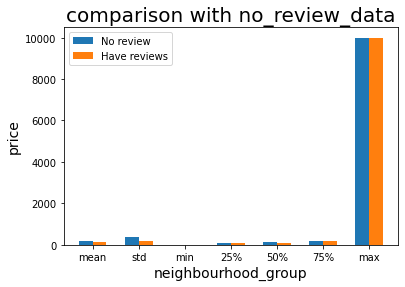

In [52]:
stats_no_review = data_no_review.describe()
stats_have_review = data_with_review.describe()

stats_no_review['Review'] = 0
stats_have_review['Review'] = 1

stats_no_review = stats_no_review.drop(['count'])
stats_have_review = stats_have_review.drop(['count'])


stats_review = pd.concat([stats_no_review,stats_have_review])

result_stats = stats_review.groupby('Review')


plt.bar(stats_no_review.index, 

            stats_no_review.price, 

            width = -0.3,
            align = 'edge',

            label=name)


plt.bar(stats_have_review.index, 
            stats_have_review.price, 

            width = 0.3,
            align = 'edge',

            label=name)        

plt.legend(['No review','Have reviews'],fontsize=10, loc='upper left') # legend position

plt.title('comparison with no_review_data', fontsize=20)

plt.xlabel('neighbourhood_group', fontsize=14)

plt.ylabel('price', fontsize=14)

plt.show()


- If you see the statistics between those two samples, we cannot say they have huge difference with this plot.
- But I still the price can be the important factor between them, so I analyze with price more.

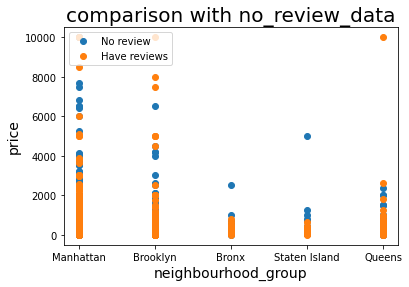

In [53]:

result = pd.concat([data_no_review,data_with_review])

result1 = result.groupby('Review')

fig, ax = plt.subplots()

for name, group in result1:

    ax.plot(group.neighbourhood_group, 

            group.price, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(['No review','Have reviews'],fontsize=10, loc='upper left') # legend position

plt.title('comparison with no_review_data', fontsize=20)

plt.xlabel('neighbourhood_group', fontsize=14)

plt.ylabel('price', fontsize=14)

plt.show()

- When we see this plot, we can find that 0 review rooms are more expensive than other rooms which have reviews.
- I need other information more to decide this guess is right or wrong, but for now, the price can be the factor that those rooms don't have any reviews which means that people didn't go there well.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


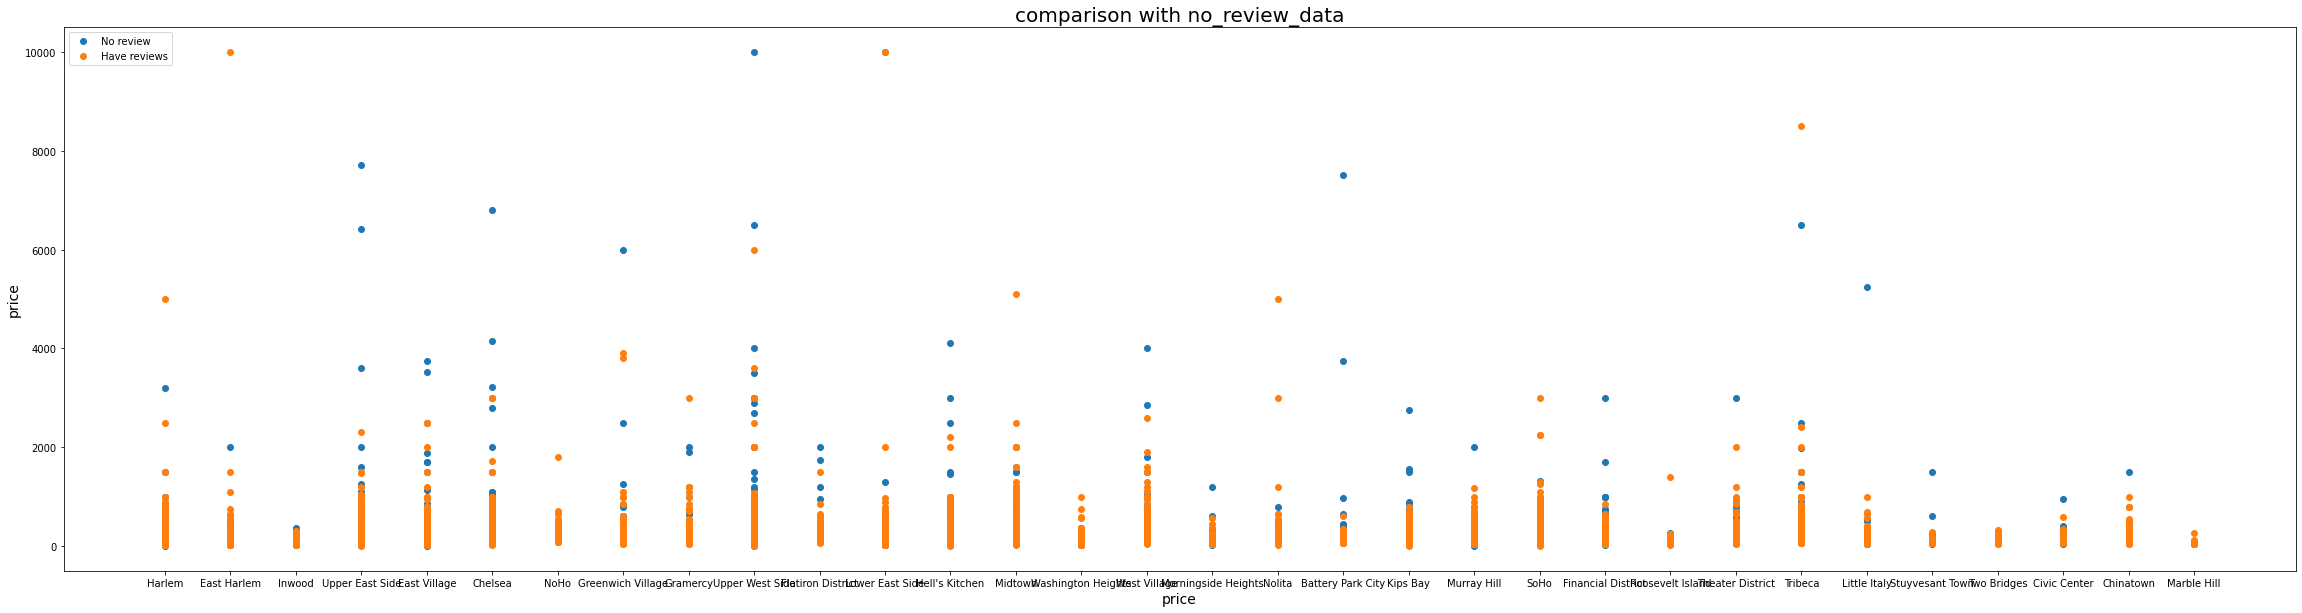

In [54]:

result = pd.concat([data_no_review,data_with_review])

result1 = result[result['neighbourhood_group']=='Manhattan'].groupby('Review')

data_no_review = data[data['number_of_reviews']== 0]
data_no_review['Review'] = 0
result = pd.concat([data_no_review,data_with_review])

result1 = result[result['neighbourhood_group']=='Manhattan'].groupby('Review')

data_no_review = data[data['number_of_reviews']== 0]
data_no_review['Review'] = 0

fig, ax = plt.subplots(figsize = (40,10))

for name, group in result1:

    ax.plot(group.neighbourhood, 

            group.price, 

            marker='o', 
            

            linestyle='',

            label=name)

ax.legend(['No review','Have reviews'],fontsize=10, loc='upper left') # legend position

plt.title('comparison with no_review_data', fontsize=20)

plt.xlabel('price', fontsize=14)

plt.ylabel('price', fontsize=14)

plt.show()


- Similary, we can find the same think in the upper plot.
- This is Manhattan neighbour data, and it seems that 0 review rooms are quite expensive than others.

- I want to try this with factor analysis or correlation analysis, but we cannot know the exact date that the number of reviews are posted, so I just printed these scatter plot for building hypothesis.

2. Time Series Analysis with the number of reviews to know when is the most busiest date among one year or couple of years.

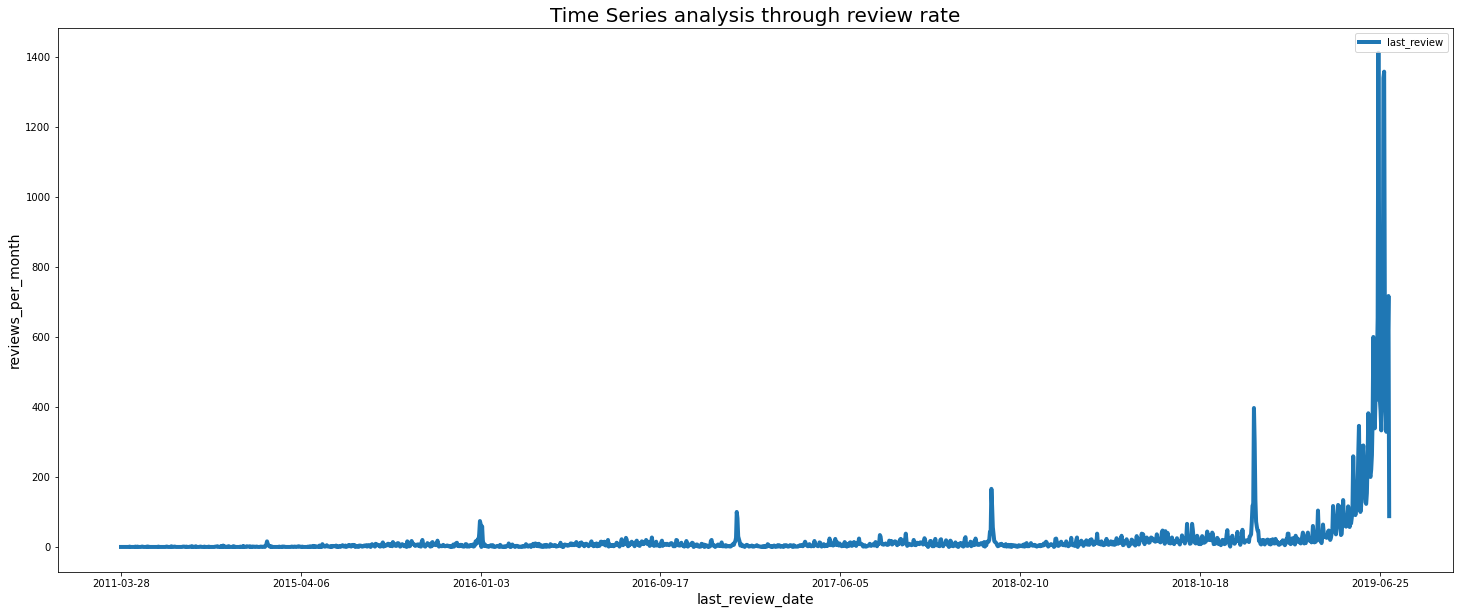

In [209]:

data_time = data_normalize.copy()

data_time.drop(data_time.loc[data_time['last_review']=='2030-01-01'].index, inplace=True)

data_time = data_time['last_review'].value_counts()


data_time = data_time.sort_index()

#pd.date_range("2018-4-1", "2018-4-30")
data_time = data_time.to_frame()

data_time.plot(figsize = (25,10),linewidth = 4)

plt.title('Time Series analysis through review rate', fontsize=20)

plt.xlabel('last_review_date', fontsize=14)

plt.ylabel('reviews_per_month', fontsize=14)

plt.show()


- We can find that there's some seasonality for a year.
- And also we can see that the number of people using Airbnb has increased  in 2019.

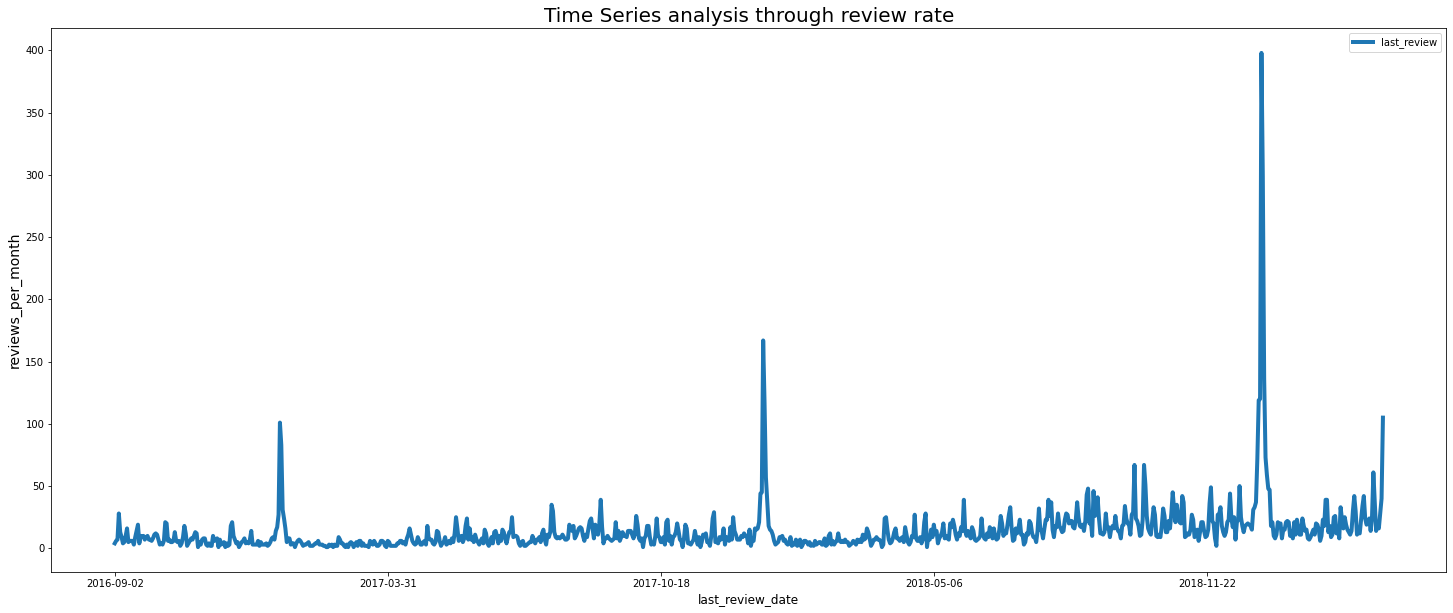

In [233]:

data_time = data_normalize.copy()
data_time.drop(data_time.loc[data_time['last_review']=='2030-01-01'].index, inplace=True)
data_time = (data_time[data_time['last_review']<'2019-04-01'])
data_time = (data_time[data_time['last_review']>'2016-09-01'])

data_time = data_time['last_review'].value_counts()
data_time = data_time.sort_index()

#pd.date_range("2018-4-1", "2018-4-30")
data_time = data_time.to_frame()

data_time.plot(figsize = (25,10),linewidth = 4)


plt.title('Time Series analysis through review rate', fontsize=20)

plt.xlabel('last_review_date', fontsize=12)

plt.ylabel('reviews_per_month', fontsize=14)

plt.show()



- When we enlarged the graph to about 3 years, we could see that people often use airbnb and leave reviews mainly in winter.

# After doing this assignment
- I want to do other analysis like factor analysis, or clustering with combining with other data like the price of real estate prices in NYC or the rating data from airbnb.

- This was really interesting assignment since I should decide how should I analyze, what should I printed, and what should I interpreted through dataset.
